In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def leastSquare(data):
    '''
    最小二乗法関数
    '''
    ave_x = np.average(data[:,0])
    ave_y = np.average(data[:,1])
    var_x = np.var(data[:,0])
    sum_xy = data[:,0] * data[:,1]  
    ave_xy = np.average(sum_xy)
    conv_xy = ave_xy -ave_x * ave_y

    slope = conv_xy / var_x
    intercept = ave_y - slope * ave_x
    return slope, intercept


In [20]:
def ransac(data,
# parameters for RANSAC
s = 2,   # required sample num to decide parameter
N = 100, # max loop num
d = 0.5, # threshold error val for inlier
t = 800  # requrired inlier sample num to be correnct param
):
    # 初期化
    number = len(data) # Total number of points
    bestInlierNum = 0 # Best fitting line with largest number of inliers
    bestParameter1=0 # parameters for best fitting line
    bestParameter2=0
    bestdist = 0

    for i in range(N):
        # ランダムに2ポイントを抽出
        sample = data[np.random.choice(len(data), 2, False)]
        
        # すべての点とモデル線との距離を計算する。
        modelLine = sample[1,:] - sample[0,:]
        
        # モデル線の法線ベクトルを計算
        modelLineNorm = modelLine / np.linalg.norm(modelLine)
        normVector = [-modelLineNorm[1],modelLineNorm[0]] # Ax+By+C=0 A=-modelLineNorm[1],B=modelLineNorm[0]
        
        # 法線ベクトルとすべての点と内積をとることで、モデル線からの距離を計算する。
        distance = np.dot((data - np.tile(sample[0,:],(number,1))),normVector);

        # 閾値内のポイントを探す
        inlierNum = np.sum(abs(distance) <=d)

        # よりよいモデル線を見つけた場合、モデル線を更新する。
        if inlierNum>=t and inlierNum>bestInlierNum:
            bestInlierNum = inlierNum;
            parameter1 = (sample[1,1]-sample[0,1])/(sample[1,0]-sample[0,0]); #傾き
            parameter2 = sample[0,1]-parameter1*sample[0,0]; #切片
            bestParameter1 = parameter1;
            bestParameter2 = parameter2;
            bestdist = distance
    return bestParameter1,bestParameter2,bestInlierNum,bestdist

-2.0796440231401654 18.46321461688971 4
4
[ 4.91967862e-01 -4.44089210e-16 -5.40352460e-01 -7.42553021e-01
 -4.48532944e-01  0.00000000e+00]


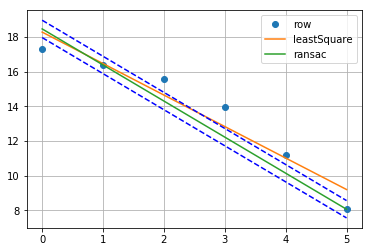

In [21]:
# samples
points = np.array([[x, 15 -2*x + 5*np.random.rand()] for x in np.arange(0,6)])

#最小二乗法
slope, intercept = leastSquare(points)
#RANSAC
a, b,num,dist = ransac(points,
                    s = 2,   # required sample num to decide parameter
                    N = 100, # max loop num
                    d = 0.5, # threshold error val for inlier
                    t = 4  # requrired inlier sample num to be correnct param
                 )

ls = slope * points[:,0] + intercept
rs = a  * points[:,0] + b
print(a,b,num)

%matplotlib inline
fig = plt.figure()
ax = fig.subplots(1,1)
ax.plot(points[:,0],points[:,1],"o",label = 'row')
ax.plot(points[:,0],ls,label = 'leastSquare')
ax.plot(points[:,0],rs,label = 'ransac')
ax.plot(points[:,0],rs + 0.5,'b--')
ax.plot(points[:,0],rs - 0.5,'b--')
ax.legend()
ax.grid()
print(num)
print(dist)

data---
 [[0 0]
 [1 1]
 [2 3]]
sample---
 [[0 0]
 [1 1]]
modelLine---
 [1 1]
normVector---
 [-0.7071067811865475, 0.7071067811865475]
distance---
 [0.         0.         0.70710678]


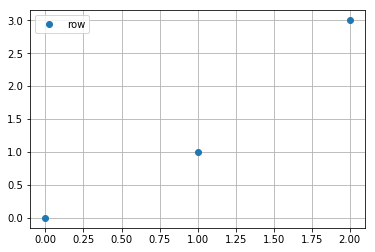

In [320]:
data = np.array([[x, x] for x in np.arange(0,3)])
data[2,1] = 3
print("data---\n",data)
number = len(data)

# ランダムに2ポイントを抽出
# sample = data[np.random.choice(len(data), 2, False)]
sample = data[0:2,0:2] #for debug
print("sample---\n",sample)

# すべての点とモデル線との距離を計算する。
modelLine = sample[1,:] - sample[0,:]
print("modelLine---\n",modelLine)

# モデル線の法線ベクトルを計算
modelLineNorm = modelLine / np.linalg.norm(modelLine)
normVector = [-modelLineNorm[1],modelLineNorm[0]] # Ax+By+C=0 A=-modelLineNorm[1],B=modelLineNorm[0]
print("normVector---\n",normVector)

# 法線ベクトルとすべての点と内積をとることで、モデル線からの距離を計算する。
distance = np.dot((data - np.tile(sample[0,:],(number,1))),normVector);
print("distance---\n",abs(distance))

%matplotlib inline
fig = plt.figure()
ax = fig.subplots(1,1)
ax.plot(data[:,0],data[:,1],"o",label = 'row')
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


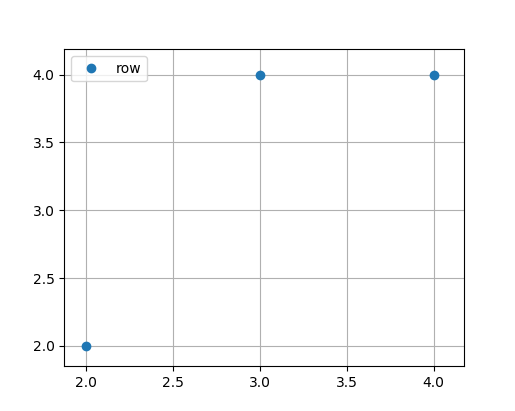

In [7]:
import numpy as np
%matplotlib nbagg
data = np.array([[x, x] for x in np.arange(0,5)])
data[3,1] = 4

fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.subplots(1,1)
ax.plot(data[:,0],data[:,1],"o",label = 'row')
ax.legend()
ax.grid()